In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

seed = 11

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

C:\Users\user\AppData\Local\Temp\ipykernel_5416\3909443915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Strength,bins=100)
C:\Users\user\AppData\Local\Temp\ipykernel_5416\3909443915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original.Strength,bins=100,color='red')


<AxesSubplot: xlabel='Strength', ylabel='Density'>

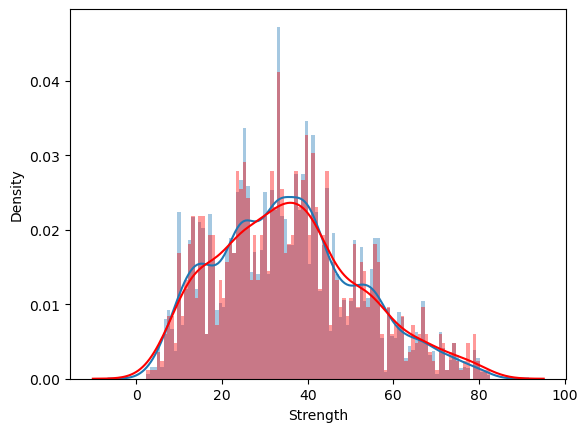

In [4]:
sns.distplot(train.Strength,bins=100)
sns.distplot(original.Strength,bins=100,color='red')

In [5]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [6]:
print(len(train))
print(len(test))

5407
3605


In [7]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
train[train.AgeInDays == 1]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
103,500.0,0.0,0.0,192.0,0.0,1125.0,613.0,1,31.54
2174,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,1,52.01
2287,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,1,6.47
2687,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,21.91
3676,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,6.27
6129,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,12.64
6146,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1,6.27


In [9]:
# train.drop('Strength',axis=1).drop_duplicates().columns

In [10]:
# train = pd.DataFrame(train.groupby(list(train.drop('Strength',axis=1).drop_duplicates().columns)).mean('Strength')).reset_index()

In [11]:
print(len(train))
print(len(test))

6411
3605


In [12]:
train = train.drop(train[(train.AgeInDays == 1) & (train.Strength > 15)].index).reset_index(drop=True)
train = train.drop(train[(train.AgeInDays == 3) & (train.Strength > 50)].index).reset_index(drop=True)

In [13]:
# test = test.drop_duplicates()

In [14]:
# # Calculate TotalComponentWeight
# # train['TotalComponentWeight'] = train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'] + train['WaterComponent'] + train['SuperplasticizerComponent'] + train['CoarseAggregateComponent'] + train['FineAggregateComponent']

# # Calculate Water-Cement-Ratio (WCR)
# train['WCR'] = train['WaterComponent'] / train['CementComponent']

# # Calculate Aggregate-Ratio (AR)
# train['AR'] = (train['CoarseAggregateComponent'] + train['FineAggregateComponent']) / train['CementComponent']

# # Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
# train['WCPR'] = train['WaterComponent'] / (train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'])

# # Calculate Cement-Age
# train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']

# # Calculate TotalComponentWeight
# # test['TotalComponentWeight'] = test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'] + test['WaterComponent'] + test['SuperplasticizerComponent'] + test['CoarseAggregateComponent'] + test['FineAggregateComponent']

# # Calculate Water-Cement-Ratio (WCR)
# test['WCR'] = test['WaterComponent'] / test['CementComponent']

# # Calculate Aggregate-Ratio (AR)
# test['AR'] = (test['CoarseAggregateComponent'] + test['FineAggregateComponent']) / test['CementComponent']

# # Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
# test['WCPR'] = test['WaterComponent'] / (test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'])

# # Calculate Cement-Age
# test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']

In [15]:
# train['Unknown'] = (train.CoarseAggregateComponent-train.FlyAshComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent + train.WaterComponent + train.SuperplasticizerComponent)
# test['Unknown'] = (test.CoarseAggregateComponent-test.FlyAshComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent + test.WaterComponent + test.SuperplasticizerComponent)

In [16]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
6400,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
6401,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
6402,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
6403,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [17]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [18]:
test.loc[197,'AgeInDays'] = 14

In [19]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])
# 90,91일 붙이기, 360-365일 붙이기

[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [20]:
train[train.AgeInDays == 91].index

Int64Index([  37,   46,  159,  182,  423,  508,  537,  564,  711,  721,  729,
             783,  824, 1008, 1020, 1272, 1289, 1299, 1311, 1399, 1405, 1445,
            1531, 1589, 1641, 1653, 1710, 1723, 1875, 1918, 2226, 2239, 2345,
            2421, 2422, 2474, 2522, 2722, 2740, 2775, 2854, 2899, 3216, 3318,
            3403, 3503, 3523, 3547, 3597, 3602, 3615, 3837, 3889, 3900, 4013,
            4109, 4132, 4283, 4318, 4321, 4354, 4378, 4432, 4473, 4510, 4511,
            4890, 5085, 5131, 5187, 5292, 5316, 5381, 5543, 5544, 5545, 5546,
            5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5556, 5557,
            5558, 5559],
           dtype='int64')

In [21]:
train.loc[train[train.AgeInDays == 91].index,'AgeInDays'] = 90
test.loc[test[test.AgeInDays == 91].index,'AgeInDays'] = 90
train.loc[train[train.AgeInDays == 360].index,'AgeInDays'] = 365
test.loc[test[test.AgeInDays == 360].index,'AgeInDays'] = 365

In [22]:
print(len(train))
print(len(test))

6405
3605


In [23]:
from sklearn.preprocessing import MinMaxScaler
encoder = MinMaxScaler()
encoder.fit(np.array([i for i in sorted(train.AgeInDays.unique())]).reshape(-1,1))
train.AgeInDays = encoder.transform(np.array(train.AgeInDays).reshape(-1,1))
test.AgeInDays = encoder.transform(np.array(test.AgeInDays).reshape(-1,1))

In [24]:
from sklearn.preprocessing import StandardScaler

standard_target = ['CementComponent','WaterComponent',
                  'CoarseAggregateComponent','FineAggregateComponent']
                  #'TotalComponentWeight','WCR','AR','WCPR','Cement-Age']

for i in standard_target:
    tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
    # tar = np.array([i for i in train[f'{i}']]).reshape(-1,1)
    encoder = StandardScaler()
    encoder.fit(tar)
    train[f'{i}'] = encoder.transform(np.array(train[f'{i}']).reshape(-1,1))
    test[f'{i}'] = encoder.transform(np.array(test[f'{i}']).reshape(-1,1))

train = train.reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5416\917849795.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Temp\ipykernel_5416\917849795.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Temp\ipykernel_5416\917849795.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
C:\Users\user\AppData\Local\Temp\ipyk

In [25]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000
mean,-0.013874,60.732756,35.578048,0.005107,4.408468,-0.004687,-0.015018,0.137069,35.405452
std,1.002506,84.001893,56.878931,1.020078,5.770142,1.003068,1.006873,0.190260,16.377283
min,-1.855144,0.000000,0.000000,-3.363609,0.000000,-2.442179,-2.278587,0.000000,2.330000
25%,-0.805768,0.000000,0.000000,-0.574680,0.000000,-0.667973,-0.489078,0.016484,23.640000
50%,-0.014700,0.000000,0.000000,0.079646,0.000000,-0.181037,0.106575,0.074176,33.940000
75%,0.727935,129.800000,94.100000,0.401445,8.600000,0.743622,0.616770,0.151099,45.710000
max,2.304373,359.400000,200.100000,3.351274,32.200000,2.012763,2.805506,1.000000,82.600000


In [26]:
drop_list = []

for tar in standard_target:
    for i in range(len(train)):
        if abs(train.loc[i,tar]) > 2.58:
            drop_list.append(i)

print('drop :',len(set(drop_list)))
train = train.drop(sorted(list(set(drop_list)))).reset_index(drop=True)

drop : 58


In [27]:
train = train.sort_values('Strength').reset_index(drop=True)

In [28]:
# tar = ['Cement-Age','AgeInDays','WCPR','SuperplasticizerComponent','WaterComponent']
# test = test.loc[:,tar]
# tar.append('Strength')
# train = train.loc[:,tar]

In [29]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,-0.012408,60.493178,35.342477,0.022909,4.330997,0.001748,-0.023738,0.137385,35.352904
std,1.002620,84.242895,56.660638,0.979557,5.687919,0.998997,0.997353,0.190923,16.376817
min,-1.855144,0.000000,0.000000,-2.505477,0.000000,-2.442179,-2.278587,0.000000,2.330000
25%,-0.805768,0.000000,0.000000,-0.563953,0.000000,-0.667973,-0.489078,0.016484,23.520000
50%,-0.014700,0.000000,0.000000,0.117189,0.000000,-0.162906,0.106575,0.074176,33.800000
75%,0.619673,129.800000,94.000000,0.401445,8.600000,0.743622,0.616770,0.151099,45.370000
max,2.304373,359.400000,200.100000,2.332242,32.200000,2.012763,2.491736,1.000000,82.600000


In [30]:
train.corr()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.361403,-0.315076,-0.016189,0.020984,0.041444,-0.340172,0.096922,0.210178
BlastFurnaceSlag,-0.361403,1.000000,-0.183706,0.060249,0.099019,-0.283419,-0.196665,-0.054764,0.063208
FlyAshComponent,-0.315076,-0.183706,1.000000,-0.357521,0.477580,-0.087291,0.118399,-0.139511,0.011480
WaterComponent,-0.016189,0.060249,-0.357521,1.000000,-0.655532,-0.091054,-0.348770,0.252589,-0.140791
SuperplasticizerComponent,0.020984,0.099019,0.477580,-0.655532,1.000000,-0.294114,0.152714,-0.176902,0.226385
CoarseAggregateComponent,0.041444,-0.283419,-0.087291,-0.091054,-0.294114,1.000000,-0.239407,-0.013929,-0.101545
FineAggregateComponent,-0.340172,-0.196665,0.118399,-0.348770,0.152714,-0.239407,1.000000,-0.118484,-0.099838
AgeInDays,0.096922,-0.054764,-0.139511,0.252589,-0.176902,-0.013929,-0.118484,1.000000,0.335008
Strength,0.210178,0.063208,0.011480,-0.140791,0.226385,-0.101545,-0.099838,0.335008,1.000000


<AxesSubplot: >

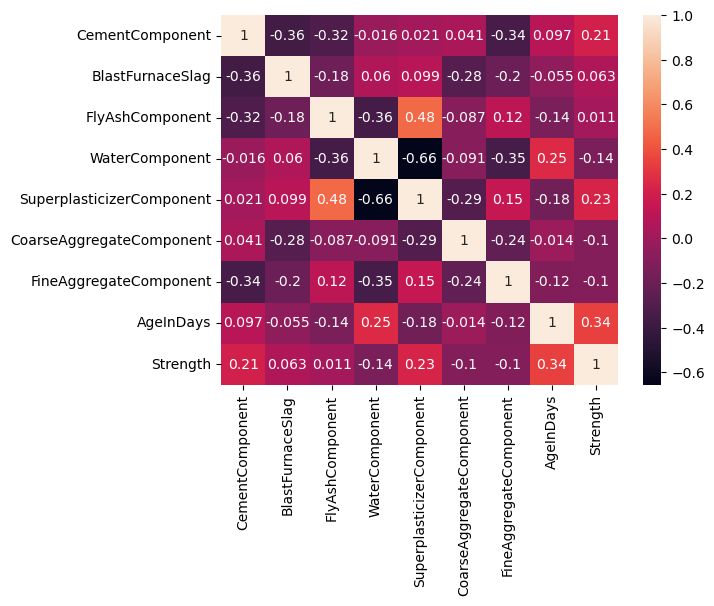

In [31]:
sns.heatmap(train.corr(),annot=True)

In [32]:
# tar = ['AR','AgeInDays','CementComponent']
# train = train.drop(tar,axis=1)
# test = test.drop(tar,axis=1)

In [33]:
X_train, X_test1, y_train, y_test1 = train_test_split(train.drop('Strength',axis=1), train.Strength, test_size=0.2)

X, y = X_train, y_train
X1, y1 = X_test1, y_test1

In [34]:
len(train)

6347

In [35]:
# tar = ['SuperplasticizerComponent','AgeInDays','WCPR','Cement-Age']
# test = test.loc[:,tar]
# tar.append('Strength')
# train = train.loc[:,tar]

In [36]:
# np.random.normal(3,0.5,100) # mu,sigma,n

C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

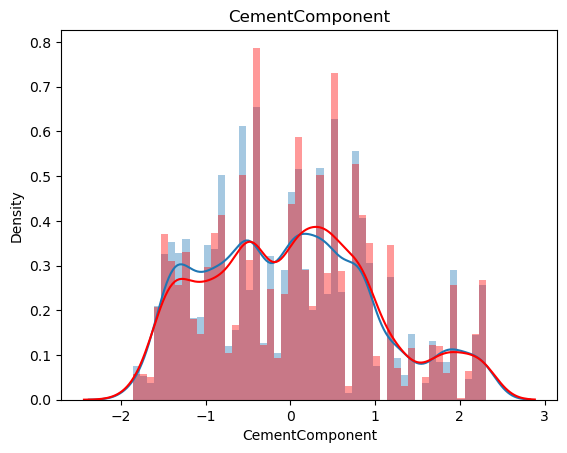

C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

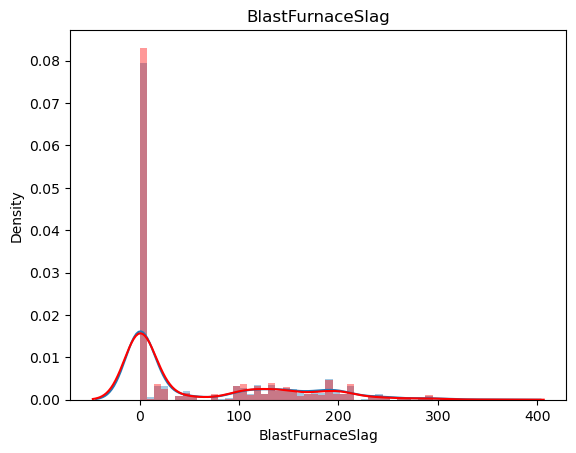

C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

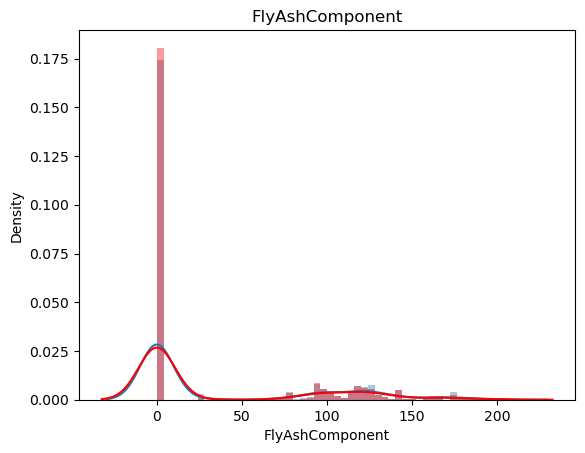

C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

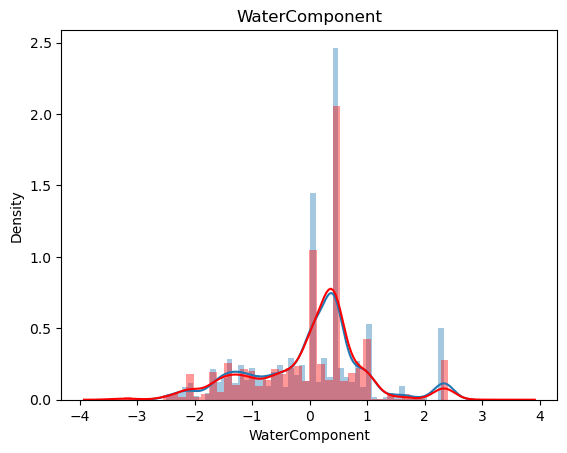

C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

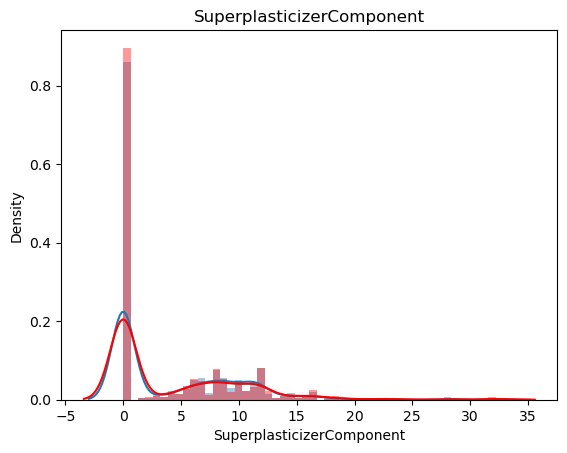

C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

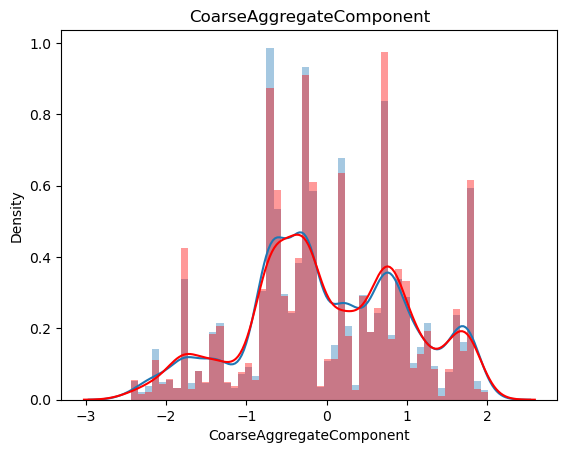

C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

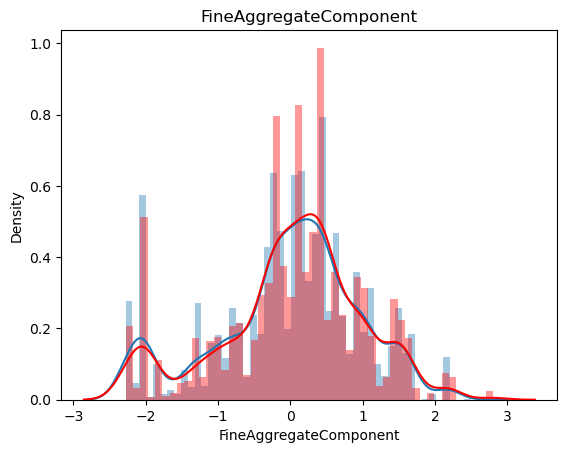

C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_5416\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[f

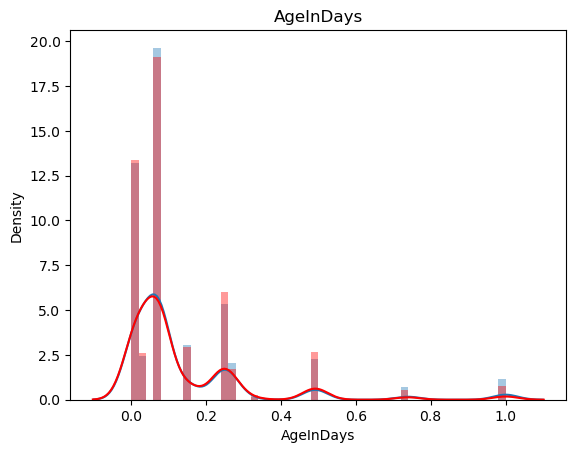

In [37]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
kor_col = ['시멘트양','용광로 찌꺼기','화석연료 재','물','감수제','건설골재양','미세골제양','양생일','강도']
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [38]:
from pycaret import regression
regression.setup(data=train,target='Strength',
                 remove_outliers=True)

,Description,Value
0,session_id,3732
1,Target,Strength
2,Original Data,"(6347, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4219, 8)"


(False,
 {'parameter': 'Hyperparameters',
  'residuals': 'Residuals',
  'error': 'Prediction Error',
  'cooks': 'Cooks Distance',
  'rfe': 'Feature Selection',
  'learning': 'Learning Curve',
  'manifold': 'Manifold Learning',
  'vc': 'Validation Curve',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'tree': 'Decision Tree',
  'residuals_interactive': 'Interactive Residuals'},
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Strength',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
          

In [39]:
best = regression.compare_models(sort='MSE',n_select=4,fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,8.8214,135.8767,11.6526,0.4909,0.3684,0.3405,0.0500
catboost,CatBoost Regressor,8.9390,141.0473,11.8727,0.4713,0.3728,0.3410,0.4440
lightgbm,Light Gradient Boosting Machine,9.0209,143.1605,11.9621,0.4633,0.3750,0.3437,0.0240
ada,AdaBoost Regressor,9.8629,152.1647,12.3329,0.4291,0.4028,0.4090,0.0200
rf,Random Forest Regressor,9.4098,155.9157,12.4829,0.4151,0.3895,0.3546,0.1060
xgboost,Extreme Gradient Boosting,9.3790,156.7132,12.5174,0.4117,0.3946,0.3557,0.0440
et,Extra Trees Regressor,9.7335,169.0053,12.9954,0.3659,0.4076,0.3640,0.0700
lr,Linear Regression,10.4531,184.0688,13.5607,0.3105,0.4466,0.4492,0.6800
lar,Least Angle Regression,10.4531,184.0688,13.5607,0.3105,0.4466,0.4492,0.0040
br,Bayesian Ridge,10.4556,184.0723,13.5608,0.3105,0.4470,0.4499,0.0040


In [40]:
best_tune = [regression.tune_model(i) for i in best]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.1434,136.5085,11.6837,0.4690,0.3864,0.3734
1,10.1603,159.2886,12.6210,0.4602,0.3981,0.4030
2,9.4300,142.4061,11.9334,0.4736,0.4017,0.4098
3,9.7943,154.7633,12.4404,0.3601,0.4145,0.4233
4,9.2172,137.4657,11.7246,0.4400,0.3630,0.3571
5,9.8448,154.2685,12.4205,0.4652,0.3991,0.3996
6,10.2155,162.9585,12.7655,0.4279,0.4005,0.3978
7,9.8925,159.1425,12.6152,0.4399,0.4173,0.4179
8,9.5211,136.3934,11.6788,0.4487,0.3964,0.4076


In [41]:
best_tune

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.2, loss='ls', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3732, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001, min_split_gain=0.3,
              

In [42]:
target = 'Strength'
features = list(test.columns)

In [43]:
best_tune[0]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.2, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3732, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
best_tune[0].feature_importances_

array([0.12804222, 0.03855708, 0.02361227, 0.08803361, 0.06677114,
       0.03793106, 0.04073523, 0.5763174 ])

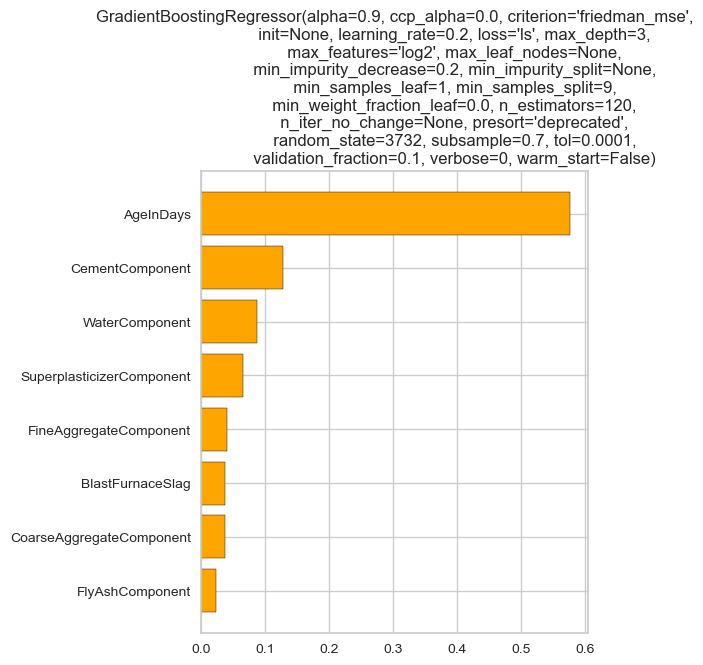

In [45]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 0
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "orange", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()



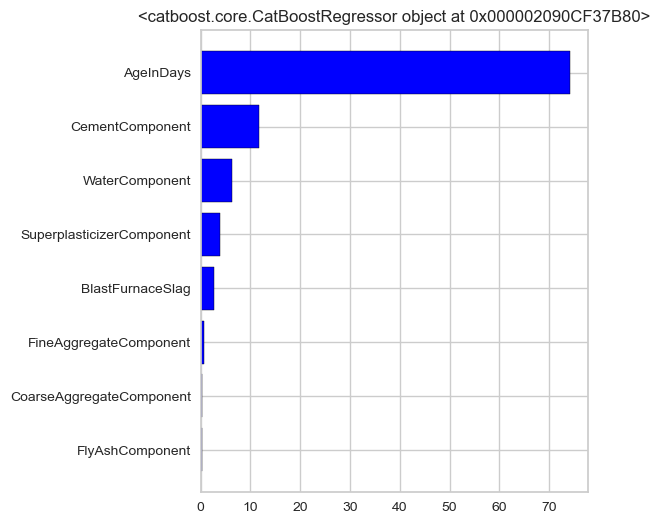

In [46]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 1
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "blue", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()



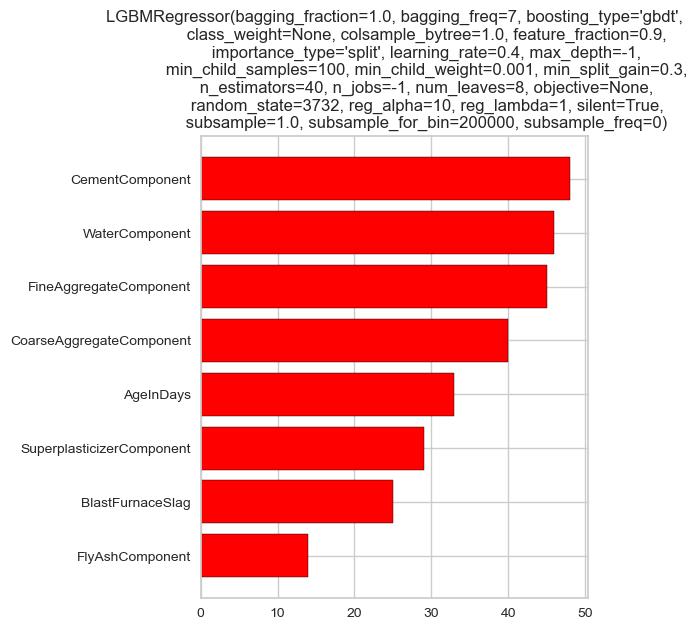

In [47]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 2
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "red", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()


In [48]:
enssemble = []
for i in range(len(best_tune)):
    best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    enssemble.append(best_tune[i].predict(test))

In [49]:
enssemble

[array([49.89758012, 19.6382613 , 32.93405239, ..., 40.72666116,
        35.53651464, 21.85646696]),
 array([46.53930091, 20.3543771 , 31.81856789, ..., 39.03769068,
        37.32596766, 20.39049406]),
 array([47.9624114 , 19.84097803, 32.49116479, ..., 41.97406685,
        36.61463959, 17.27812349]),
 array([45.57876533, 22.39233546, 38.20322086, ..., 40.50362661,
        25.45062016, 23.22719154])]

In [50]:
enssemble = np.array(enssemble)
enssemble.mean(axis=0)

array([47.49451444, 20.55648797, 33.86175148, ..., 40.56051132,
       33.73193551, 20.68806901])

In [51]:
best_tune

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.2, loss='ls', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3732, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001, min_split_gain=0.3,
              

<AxesSubplot: xlabel='Strength', ylabel='Density'>

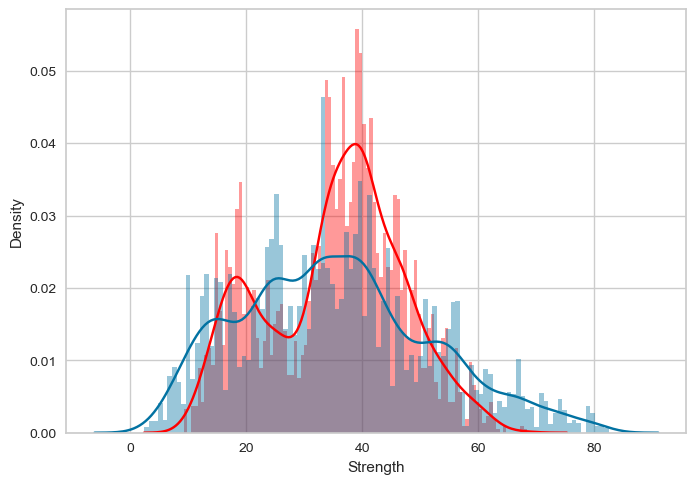

In [52]:
sub = pd.read_csv('./sample_submission.csv')
# md = best_tune[0].fit(train.drop('Strength',axis=1),train['Strength'])
sub['Strength'] = enssemble[2]#md.predict(test)
#enssemble[0] #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sns.distplot(sub['Strength'],bins=100,color='red')
sns.distplot(train.Strength,bins=100)

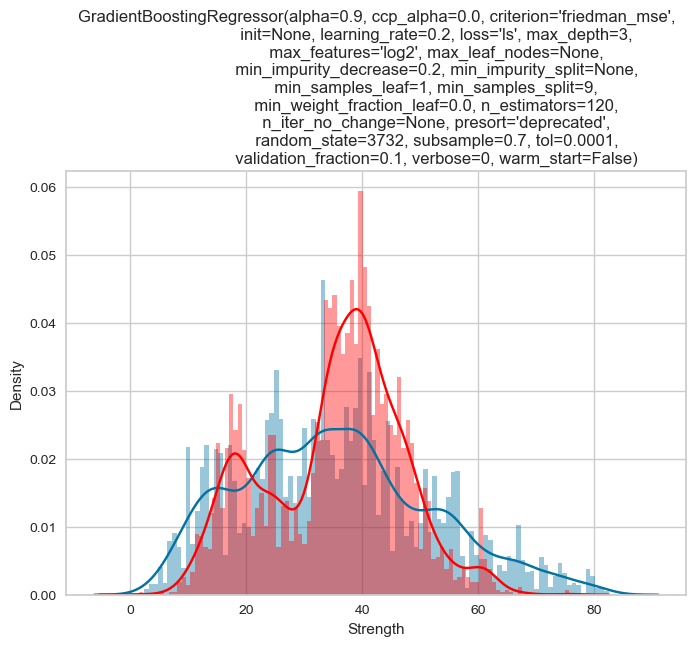

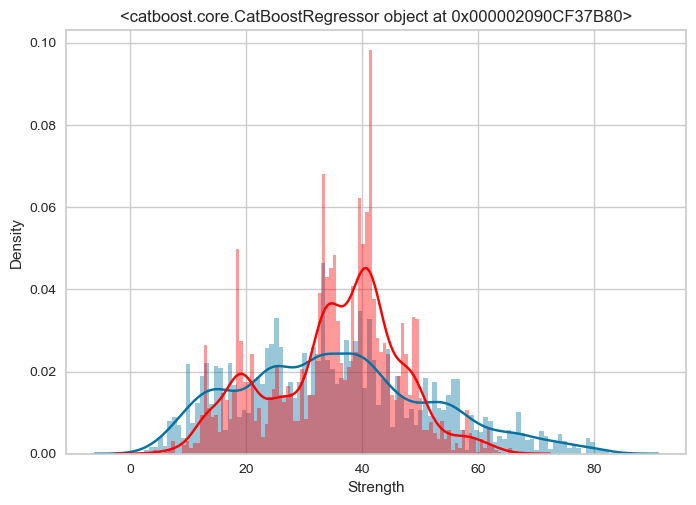

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


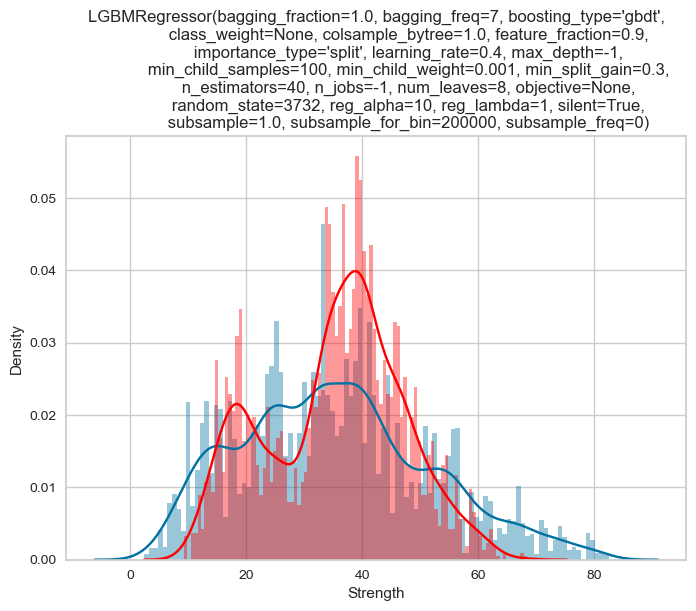

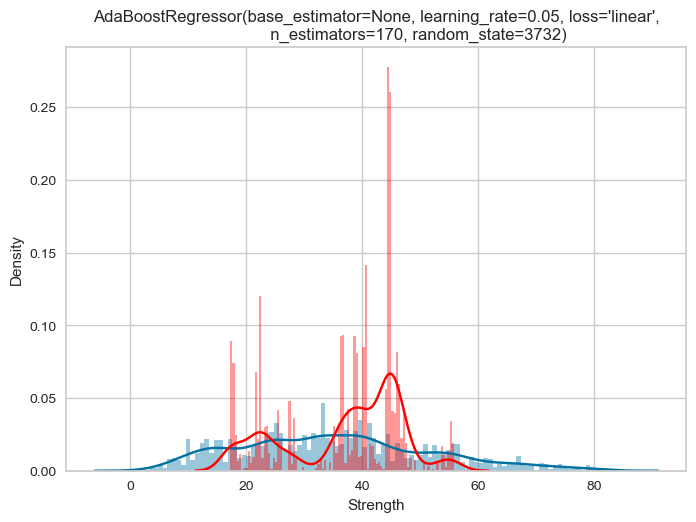

In [53]:
preds = []
for i in range(len(best_tune)):
    md = best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    pred = md.predict(test)
    preds.append(pred)
    
    plt.title(f'{md}')    
    sns.distplot(train.Strength,bins=100)
    sns.distplot(enssemble[i],bins=100,color='red')
    # sns.distplot(density_values)
    plt.show()

# Optimizing coefficients : optuna

In [54]:
from sklearn.metrics import mean_squared_error
import optuna
 
def coef_objective(trial):
    a = trial.suggest_float('a', 0, 1)
    b = trial.suggest_float('b', 0, 1)
    c = trial.suggest_float('c', 0, 1)
    d = trial.suggest_float('d', 0, 1)
#    e = trial.suggest_float('e', 0, 1)

#     X = X1
#     y = y1
    
#     preds_eval = []
#     for model in modelsCB:
#         preds_eval.append(model.predict(X))
    
#     resCB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsXB:
#         preds_eval.append(model.predict(X))
    
#     resXB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsLB:
#         preds_eval.append(model.predict(X))
    
#     resLB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsSGB:
#         preds_eval.append(model.predict(X))
    
#     resSGB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsLR:
#         preds_eval.append(model.predict(X))
    
#     resLR = np.average(np.array(preds_eval),axis=0)
    
    enssemble = []
    for i in range(len(best_tune)):
        # best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
        enssemble.append(best_tune[i].predict(X1))
        
    # res1 =  (resCB * a + resXB * b + resLB * c + resSGB * d + resLR * e)/(a + b + c + d + e)
    res1 = (enssemble[0]*a + enssemble[1]*b + enssemble[2]*c + enssemble[3]*d)/(a+b+c+d)
    
    res = mean_squared_error(y1, res1, squared=False)

    return res

study = optuna.create_study(direction= 'minimize')
study.optimize(coef_objective, n_trials= 100)

[I 2023-03-08 09:57:32,277] A new study created in memory with name: no-name-196f6d17-9d9b-4ee1-9735-76d17158d8e3
[I 2023-03-08 09:57:32,306] Trial 0 finished with value: 11.34143877430878 and parameters: {'a': 0.16382309687680885, 'b': 0.42461012324358594, 'c': 0.3442286863352777, 'd': 0.09305523859911413}. Best is trial 0 with value: 11.34143877430878.
[I 2023-03-08 09:57:32,335] Trial 1 finished with value: 11.203631420829506 and parameters: {'a': 0.8639731053608408, 'b': 0.7211999466872938, 'c': 0.8412853069105325, 'd': 0.09008192685751137}. Best is trial 1 with value: 11.203631420829506.
[I 2023-03-08 09:57:32,365] Trial 2 finished with value: 11.274661457914565 and parameters: {'a': 0.3776572795943146, 'b': 0.5330457003380195, 'c': 0.8931166100540173, 'd': 0.25794516314410054}. Best is trial 1 with value: 11.203631420829506.
[I 2023-03-08 09:57:32,396] Trial 3 finished with value: 11.368574530743667 and parameters: {'a': 0.8355085695010435, 'b': 0.861274571083944, 'c': 0.65240264

[I 2023-03-08 09:57:33,576] Trial 32 finished with value: 11.142656490576828 and parameters: {'a': 0.9514630304905856, 'b': 0.4207795171520358, 'c': 0.8435055300884383, 'd': 0.0860312454734288}. Best is trial 25 with value: 11.123273530561951.
[I 2023-03-08 09:57:33,618] Trial 33 finished with value: 11.121517736114544 and parameters: {'a': 0.8723194131143621, 'b': 0.23403896472425706, 'c': 0.8876095204213088, 'd': 0.12500338119351348}. Best is trial 33 with value: 11.121517736114544.
[I 2023-03-08 09:57:33,661] Trial 34 finished with value: 11.150323821188904 and parameters: {'a': 0.8592064269012031, 'b': 0.2145071120479104, 'c': 0.8832028619397354, 'd': 0.25137878519947715}. Best is trial 33 with value: 11.121517736114544.
[I 2023-03-08 09:57:33,704] Trial 35 finished with value: 11.145929837937626 and parameters: {'a': 0.8479135688741977, 'b': 0.3302110184440654, 'c': 0.8145888643823476, 'd': 0.13430423737117886}. Best is trial 33 with value: 11.121517736114544.
[I 2023-03-08 09:57:

[I 2023-03-08 09:57:34,956] Trial 64 finished with value: 11.086718940678576 and parameters: {'a': 0.6643661300967533, 'b': 0.08155561075631299, 'c': 0.789974726292926, 'd': 0.0634570816050544}. Best is trial 43 with value: 11.049008810961494.
[I 2023-03-08 09:57:34,999] Trial 65 finished with value: 11.116717239779787 and parameters: {'a': 0.6100334200479716, 'b': 0.12818561732384015, 'c': 0.9977595226449343, 'd': 0.10152853191995224}. Best is trial 43 with value: 11.049008810961494.
[I 2023-03-08 09:57:35,043] Trial 66 finished with value: 11.0654164128601 and parameters: {'a': 0.6984041828448274, 'b': 0.06397742004550766, 'c': 0.9144721834186186, 'd': 0.0016447673036368601}. Best is trial 43 with value: 11.049008810961494.
[I 2023-03-08 09:57:35,087] Trial 67 finished with value: 11.057954446356332 and parameters: {'a': 0.7913603498134969, 'b': 0.02633272097451426, 'c': 0.8652596380376298, 'd': 0.037652346809874164}. Best is trial 43 with value: 11.049008810961494.
[I 2023-03-08 09:

[I 2023-03-08 09:57:36,347] Trial 96 finished with value: 11.070638925190249 and parameters: {'a': 0.887260809413725, 'b': 0.07825995350107376, 'c': 0.934443250564828, 'd': 0.05363822838976361}. Best is trial 43 with value: 11.049008810961494.
[I 2023-03-08 09:57:36,391] Trial 97 finished with value: 11.05135749937895 and parameters: {'a': 0.8729789464125038, 'b': 0.04049976146064514, 'c': 0.9785092921275408, 'd': 0.0003018344438655632}. Best is trial 43 with value: 11.049008810961494.
[I 2023-03-08 09:57:36,435] Trial 98 finished with value: 11.076686871855813 and parameters: {'a': 0.9299552690139663, 'b': 0.17070160688699468, 'c': 0.9792829117057994, 'd': 0.00019518381479967026}. Best is trial 43 with value: 11.049008810961494.
[I 2023-03-08 09:57:36,480] Trial 99 finished with value: 11.084931391186807 and parameters: {'a': 0.8502027454284484, 'b': 0.08963059088986931, 'c': 0.9578399421531028, 'd': 0.09002040832914723}. Best is trial 43 with value: 11.049008810961494.


In [55]:
a = study.best_params['a']
b = study.best_params['b']
c = study.best_params['c']
d = study.best_params['d']

sum_coef = a + b + c + d
a = a / sum_coef
b = b / sum_coef
c = c / sum_coef
d = d / sum_coef

a, b, c, d

(0.44090427599029725,
 0.000281797744709566,
 0.5538243356082285,
 0.004989590656764721)

<AxesSubplot: xlabel='Strength', ylabel='Density'>

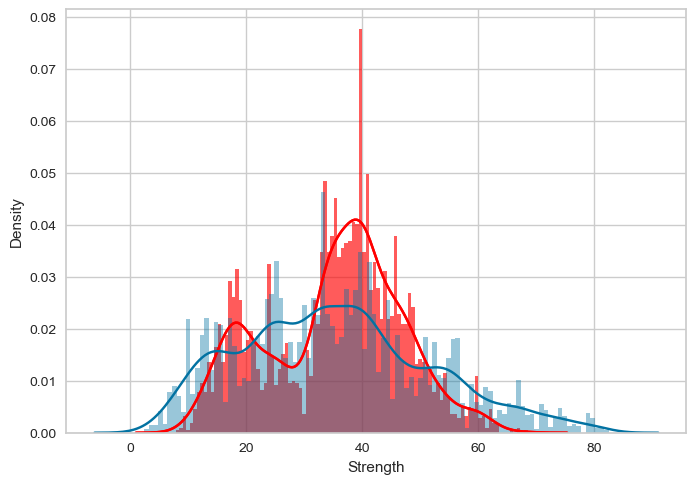

In [56]:
sub = pd.read_csv('./sample_submission.csv')
# md = best_tune[0].fit(train.drop('Strength',axis=1),train['Strength'])
# sub['Strength'] = a*enssemble[0] + b*enssemble[1] + c*enssemble[2] *d*enssemble[3] #md.predict(test)
tp = a*enssemble[0] + b*enssemble[1] + c*enssemble[2] + d*enssemble[3] #md.predict(test)
sub['Strength'] = tp

#enssemble[0] #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sns.distplot(sub['Strength'],bins=100,color='red')
sns.distplot(tp,bins=100,color='red')
sns.distplot(train.Strength,bins=100)